# MUSHROOMS

## Binary Classification

### Imports

In [2]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [350]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [4]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [7]:
# Categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


# NN1 Gill Color - Black (k)

### Split Dataset

#### Get the Labels

In [130]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [266]:
from sklearn.model_selection import train_test_split
X_white = pd.DataFrame()
X_not_white = pd.DataFrame()
y_white = pd.Series(dtype='float64')
y_not_white = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"gill-color"] == "k":
        X_white = X_white.append(X.iloc[i,:])
        y_white = y_white.append(pd.Series(y.iloc[i]))
    else:
        X_not_white = X_not_white.append(X.iloc[i,:])
        y_not_white = y_not_white.append(pd.Series(y.iloc[i]))

In [267]:
X_train_not_white, X_test_not_white, y_train_not_white, y_test_not_white = train_test_split(X_not_white, y_not_white, test_size=1-(6905/(8124-len(X_white))), random_state=11)

# print(X_test_white)
X_train_white = (X_train_not_white)
# X_test_white = X_white.append(X_test_not_white)
y_train_white = (y_train_not_white)
# y_test_white = y_white.append(y_test_not_white)

In [268]:
from sklearn.utils import shuffle
X_train_full1 = shuffle(X_train_white, random_state=11)
X_test = shuffle(X, random_state=11).iloc[2000:4000]
y_train_full1 = shuffle(y_train_white, random_state=11)
y_test = shuffle(y, random_state=11).iloc[2000:4000]

In [269]:
# print(X_test[:5])
# print(y_test.loc[:,"0"])
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=11)

# print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
# print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

#### Validation Set

In [270]:
X_valid1, X_train1 = X_train_full1[:500], X_train_full1[500:]
y_valid1, y_train1 = y_train_full1[:500], y_train_full1[500:]

print("X_train:", X_train1.shape[0], "y_train", y_train1.shape[0])
print("X_valid: ", X_valid1.shape[0], "y_valid ", y_valid1.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [271]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train1 = pipeline.fit_transform(X_train1)
X_valid1 = pipeline.fit_transform(X_valid1)
X_test1  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [273]:
tf.random.set_seed(11)

In [274]:
model1 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [275]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 45)                1035      
                                                                 
 dense_17 (Dense)            (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [276]:
model1.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [277]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [278]:
train_model1 = model1.fit(X_train1, y_train1,
                        epochs=100,
                        validation_data=(X_valid1, y_valid1),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8326 - val_loss: 0.3523 - val_accuracy: 0.8920
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8951 - val_loss: 0.3011 - val_accuracy: 0.9180
Epoch 3/100
201/201 [==============================] - 0s 845us/step - loss: 0.2721 - accuracy: 0.9136 - val_loss: 0.2639 - val_accuracy: 0.9240
Epoch 4/100
201/201 [==============================] - 0s 835us/step - loss: 0.2472 - accuracy: 0.9208 - val_loss: 0.2463 - val_accuracy: 0.9440
Epoch 5/100
201/201 [==============================] - 0s 836us/step - loss: 0.2269 - accuracy: 0.9275 - val_loss: 0.2286 - val_accuracy: 0.9380
Epoch 6/100
201/201 [==============================] - 0s 769us/step - loss: 0.2094 - accuracy: 0.9321 - val_loss: 0.2113 - val_accuracy: 0.9360
Epoch 7/100
201/201 [==============================] - 0s 791us/step - loss: 0.1927 - accuracy: 0.9363 - val_loss: 0.1968 - val_accura

### Evaluate the Best Model on Test Set

In [279]:
results1 = model1.evaluate(X_test1, y_test)
print("test loss, test acc:", results1)

63/63 [==============================] - 0s 743us/step - loss: 0.0744 - accuracy: 0.9735
test loss, test acc: [0.07439033687114716, 0.9735000133514404]


### Make Some Predictions

In [280]:
X_new1 = X_test1[:5]
y_prob1 = model1.predict(X_new1)
# print(y_prob.round(3))

In [281]:
y_pred1 = (model1.predict(X_new1) > 0.5).astype("int32")
# print(y_pred)
y_test_pred = (model1.predict(X_test1) > 0.5).astype("int32")

## KL Divergence

In [282]:
# X_new = X_test[:5]
X_df1 = pd.DataFrame(model1.predict(X_test1))
y_test_pred1 = pd.DataFrame(y_test_pred).reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test_pred1], axis=1)
y_test1 = y_test.reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test1], axis=1)
X_df1.columns = ["X_pred","y_pred","y_actual"]
print(X_df1)

        X_pred  y_pred  y_actual
0     0.004887       0         0
1     0.669374       1         0
2     0.005061       0         0
3     0.008500       0         0
4     0.011061       0         0
...        ...     ...       ...
1995  0.945727       1         1
1996  0.005228       0         0
1997  0.007173       0         0
1998  0.914227       1         1
1999  0.883179       1         1

[2000 rows x 3 columns]


In [283]:
import math
table1 = pd.DataFrame(columns=["KL_div","abs_distance","correctness"])
for i in range(0,len(X_df1)):
    # KL divergence
    p = X_df1.loc[i,"X_pred"]
    try:
        kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    except:
        kl = 0
    table1.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table1.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred1 = X_df1.loc[i,"y_pred"]
    y_act1 = X_df1.loc[i,"y_actual"]
    if y_pred1 == y_act1:
        table1.loc[i,"correctness"] = 1 # correct prediction
    else:
        table1.loc[i,"correctness"] = 0 # wrong prediction
    table1.loc[i,"y_pred"] = y_pred1

print(table1)

        KL_div abs_distance correctness  y_pred
0     0.030881     0.990225           1     0.0
1     0.634621     0.338748           0     1.0
2     0.031803     0.989877           1     0.0
3     0.048987     0.983001           1     0.0
4     0.060824     0.977877           1     0.0
...        ...          ...         ...     ...
1995  0.210909     0.891454           1     1.0
1996  0.032681     0.989544           1     0.0
1997  0.042566     0.985653           1     0.0
1998  0.292648     0.828454           1     1.0
1999  0.360542     0.766358           1     1.0

[2000 rows x 4 columns]


In [284]:
table1["count"] = 1
correctness1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness1["percent"] = 100*(correctness1["correctness"]/correctness1["count"])
print(correctness1)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]         1202   1202  100.000000
(0.1, 0.2]          393    394   99.746193
(0.2, 0.3]          155    156   99.358974
(0.3, 0.4]           68     72   94.444444
(0.4, 0.5]           46     49   93.877551
(0.5, 0.6]           46     58   79.310345
(0.6, 0.7]           37     69   53.623188


Text(0, 0.5, '% correct')

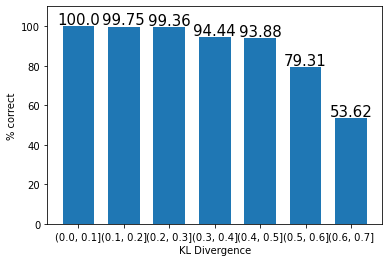

In [285]:
index = []
for i in (correctness1.index):
    index.append(str(i))
plt.bar(index,correctness1["percent"], width=0.7)
for index,data in enumerate(correctness1["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

Text(0, 0.5, '% correct')

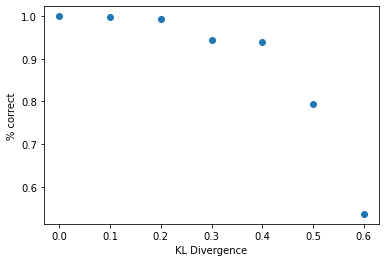

In [286]:
kl1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.80, 0.1))).apply(sum)
kl1["percent"] = (kl1["correctness"]/kl1["count"])
kl1.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl1["percent"])
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

In [287]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg1 = np.arange(0, 0.70, 0.1).reshape((-1, 1))
y_reg1 = kl1["percent"]
reg_model1 = LinearRegression().fit(x_reg1,y_reg1)

In [288]:
print('intercept(alpha):', reg_model1.intercept_)
print('slope(theta):', reg_model1.coef_)

intercept(alpha): 1.0849619452003065
slope(theta): [-0.66244127]


# NN2 Odor - Almond (a)

#### Train Set and Test Set

In [317]:
from sklearn.model_selection import train_test_split
X_green = pd.DataFrame()
X_not_green = pd.DataFrame()
y_green = pd.Series(dtype='float64')
y_not_green = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"odor"] == "a":
        X_green = X_green.append(X.iloc[i,:])
        y_green = y_green.append(pd.Series(y.iloc[i]))
    else:
        X_not_green = X_not_green.append(X.iloc[i,:])
        y_not_green = y_not_green.append(pd.Series(y.iloc[i]))

In [318]:
# X_test_green, X_train_green, y_test_green, y_train_green = train_test_split(X_green, y_green, test_size=1, random_state=11)
X_train_not_green, X_test_not_green, y_train_not_green, y_test_not_green = train_test_split(X_not_green, y_not_green, test_size=1-(6905/(8124-len(X_green))), random_state=11)

# print(X_test_green)
X_train_green = (X_train_not_green)
X_test_green = X_green.append(X_test_not_green)
y_train_green = (y_train_not_green)
y_test_green = y_green.append(y_test_not_green)

In [319]:
from sklearn.utils import shuffle
X_train_full2 = shuffle(X_train_green, random_state=11)
# X_test2 = shuffle(X_test_green, random_state=11)
y_train_full2 = shuffle(y_train_green, random_state=11)
# y_test2 = shuffle(y_test_green, random_state=11)

#### Validation Set

In [320]:
X_valid2, X_train2 = X_train_full2[:500], X_train_full2[500:]
y_valid2, y_train2 = y_train_full2[:500], y_train_full2[500:]

print("X_train:", X_train2.shape[0], "y_train", y_train2.shape[0])
print("X_valid: ", X_valid2.shape[0], "y_valid ", y_valid2.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [321]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train2 = pipeline.fit_transform(X_train2)
X_valid2 = pipeline.fit_transform(X_valid2)
X_test2  = pipeline.fit_transform(X_test)
y_test2 = y_test

### Neural Network

#### Model

In [322]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [323]:
tf.random.set_seed(11)

In [324]:
model2 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [325]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 45)                1035      
                                                                 
 dense_21 (Dense)            (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [326]:
model2.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [327]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [328]:
train_model2 = model2.fit(X_train2, y_train2,
                        epochs=100,
                        validation_data=(X_valid2, y_valid2),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8364 - val_loss: 0.3252 - val_accuracy: 0.8880
Epoch 2/100
201/201 [==============================] - 0s 981us/step - loss: 0.2969 - accuracy: 0.9068 - val_loss: 0.3111 - val_accuracy: 0.8980
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.9204 - val_loss: 0.2565 - val_accuracy: 0.9200
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9290 - val_loss: 0.2307 - val_accuracy: 0.9120
Epoch 5/100
201/201 [==============================] - 0s 923us/step - loss: 0.2114 - accuracy: 0.9299 - val_loss: 0.2377 - val_accuracy: 0.9260
Epoch 6/100
201/201 [==============================] - 0s 982us/step - loss: 0.1950 - accuracy: 0.9311 - val_loss: 0.1994 - val_accuracy: 0.9120
Epoch 7/100
201/201 [==============================] - 0s 893us/step - loss: 0.1782 - accuracy: 0.9350 - val_loss: 0.2389 - val_accuracy

### Evaluate the Best Model on Test Set

In [329]:
results2 = model2.evaluate(X_test2, y_test2)
print("test loss, test acc:", results2)

63/63 [==============================] - 0s 739us/step - loss: 0.1177 - accuracy: 0.9645
test loss, test acc: [0.11765831708908081, 0.9645000100135803]


### Make Some Predictions

In [330]:
X_new2 = X_test2[1100:1110]
y_prob2 = model2.predict(X_new2)
# print(y_prob2.round(3))

In [331]:
y_pred2 = (model2.predict(X_new2) > 0.5).astype("int32")
# print(y_pred2)
y_test_pred2 = (model2.predict(X_test2) > 0.5).astype("int32")

## KL Divergence

In [332]:
# X_new = X_test[:5]
X_df2 = pd.DataFrame(model2.predict(X_test2))
y_test_pred2 = pd.DataFrame(y_test_pred2).reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test_pred2], axis=1)
y_test2 = y_test2.reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test2], axis=1)
X_df2.columns = ["X_pred","y_pred","y_actual"]
print(X_df2)

        X_pred  y_pred  y_actual
0     0.002451       0         0
1     0.632355       1         0
2     0.002883       0         0
3     0.002268       0         0
4     0.012522       0         0
...        ...     ...       ...
1995  0.871259       1         1
1996  0.163053       0         0
1997  0.006538       0         0
1998  0.632775       1         1
1999  0.757290       1         1

[2000 rows x 3 columns]


In [333]:
import math
table2 = pd.DataFrame(columns=["KL_div","abs_distance","y_pred","correctness"])
for i in range(0,len(X_df2)):
    # KL divergence
    p = X_df2.loc[i,"X_pred"]
    kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    table2.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table2.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred = X_df2.loc[i,"y_pred"]
    y_act = X_df2.loc[i,"y_actual"]
    if y_pred == y_act:
        table2.loc[i,"correctness"] = 1 # correct prediction
    else:
        table2.loc[i,"correctness"] = 0 # wrong prediction
    table2.loc[i,"y_pred"] = y_pred

print(table2)

        KL_div abs_distance y_pred correctness
0     0.017181     0.995098      0           1
1     0.657691     0.264709      1           0
2     0.019739     0.994235      0           1
3     0.016073     0.995465      0           1
4     0.067294     0.974955      0           1
...        ...          ...    ...         ...
1995  0.383986     0.742519      1           1
1996  0.444698     0.673894      0           1
1997  0.039404     0.986924      0           1
1998  0.657462      0.26555      1           1
1999  0.554184     0.514579      1           1

[2000 rows x 4 columns]


In [334]:
table2["count"] = 1
correctness2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness2["percent"] = 100*(correctness2["correctness"]/correctness2["count"])
print(correctness2)

            correctness  count    percent
KL_div                                   
(0.0, 0.1]         1054   1055  99.905213
(0.1, 0.2]          231    233  99.141631
(0.2, 0.3]          165    167  98.802395
(0.3, 0.4]          140    146  95.890411
(0.4, 0.5]          138    143  96.503497
(0.5, 0.6]          108    118  91.525424
(0.6, 0.7]           93    138  67.391304


Text(0, 0.5, '% correct')

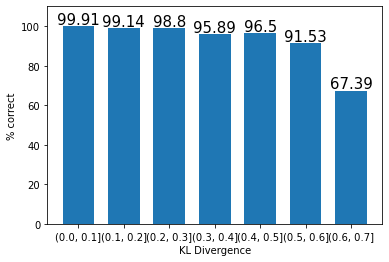

In [335]:
index = []
for i in (correctness2.index):
    index.append(str(i))
plt.bar(index,correctness2["percent"], width=0.7)
for index,data in enumerate(correctness2["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

In [336]:
len(kl2["percent"])
len(np.arange(0, 0.71,0.03))

24

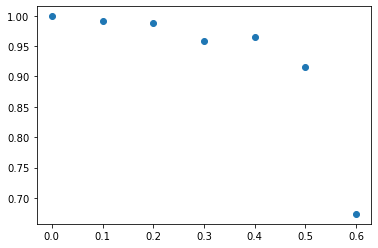

In [337]:
kl2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
kl2["percent"] = (kl2["correctness"]/kl2["count"])
kl2.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl2["percent"])
# print(kl)
# print(np.arange(0, 0.7, 0.05))

In [338]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg2 = np.arange(0, 0.7, 0.1).reshape((-1, 1))
y_reg2 = kl2["percent"]
reg_model2 = LinearRegression().fit(x_reg2,y_reg2)

In [339]:
print('intercept(alpha):', reg_model2.intercept_)
print('slope(theta):', reg_model2.coef_)

intercept(alpha): 1.050663792547909
slope(theta): [-0.41097514]


## Algorithm C: It = argmax(Ct,i)

In [340]:
# Correct answer
ans = pd.DataFrame(X_df2["y_actual"])

# NN1
alpha1 = reg_model1.intercept_
theta1 = reg_model1.coef_

# NN2
alpha2 = reg_model2.intercept_
theta2 = reg_model2.coef_

In [345]:
# Creating NN tables
nn1 = table1.drop(["abs_distance","correctness"], axis=1)
nn1["conf"] = alpha1 + theta1 * nn1["KL_div"]

nn2 = table2.drop(["abs_distance","correctness"], axis=1)
nn2["conf"] = alpha2 + theta2 * nn2["KL_div"]

nn2

,KL_div,y_pred,count,conf
0,0.017181,0,1,1.043603
1,0.657691,1,1,0.780369
2,0.019739,0,1,1.042551
3,0.016073,0,1,1.044058
4,0.067294,0,1,1.023007
...,...,...,...,...
1995,0.383986,1,1,0.892855
1996,0.444698,0,1,0.867904
1997,0.039404,0,1,1.03447
1998,0.657462,1,1,0.780463


In [346]:
# Determing higher confidence NN and choosing that arm

for i in range(0,len(nn1)):
    if nn1.loc[i,"conf"] > nn2.loc[i,"conf"]:
        ans.loc[i,"y_pred"] = nn1.loc[i,"y_pred"]
    else:
        ans.loc[i,"y_pred"] = nn2.loc[i,"y_pred"]

ans

,y_actual,y_pred
0,0,0.0
1,0,1.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1995,1,1.0
1996,0,0.0
1997,0,0.0
1998,1,1.0


#### Comparing performance

In [347]:
# NN1 performance
cost1 = 0
for i in range(0,len(nn1)):
    if nn1.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost1 += 1
    else:
        pass

# NN2 performance
cost2 = 0
for i in range(0,len(nn2)):
    if nn2.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost2 += 1
    else:
        pass

# Combined performance
cost3 = 0
for i in range(0,len(nn1)):
    if ans.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost3 += 1
    else:
        pass

In [348]:
print(f"Error count for NN1:{cost1}, NN2:{cost2}, Combined:{cost3}")

Error count for NN1:53, NN2:71, Combined:52
